<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection.

In [1]:
# Import all necessary libraries.
import os
import sys
import json
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

# change this property
NOMEROFF_NET_DIR = "/var/www/nomeroff-net/"
MASK_RCNN_DIR = "/var/www/Mask_RCNN/"

MASK_RCNN_LOG_DIR = os.path.join(NOMEROFF_NET_DIR, "logs/")
MASK_RCNN_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/np/mask_rcnn_numberplate_0700.h5")
REGION_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/npstd/npregion_v4_2018-12-27-295x64-2.h5")

sys.path.append(NOMEROFF_NET_DIR)

In [2]:
# Import license plate recognition tools.
from NomeroffNet import  filters, RectDetector, TextDetector, RegionDetector, Detector, textPostprocessing

# Initialize npdetector with default configuration file.
nnet = Detector(MASK_RCNN_DIR, MASK_RCNN_LOG_DIR)
# Load weights in keras format.
nnet.loadModel(MASK_RCNN_MODEL_PATH)

# Initialize rect detector with default configuration file.
rectDetector = RectDetector()

# Initialize text detector.
textDetector = TextDetector()

# Initialize standart detector.
regionDetector = RegionDetector()
regionDetector.load(REGION_MODEL_PATH)

Using TensorFlow backend.
/usr/local/lib64/python3.6/site-packages/keras/engine/saving.py:304: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


test/17.jpeg


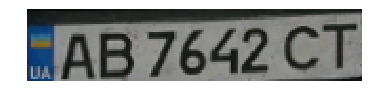

eu-ua-2015
MAB 7642 CT
AB7642CT


In [3]:
# Walking through the ./examples/images/ directory and checking each of the images for license plates.
rootDir = 'test/'
for dirName, subdirList, fileList in os.walk(rootDir):
    for fname in fileList:
        img_path = os.path.join(dirName, fname)
        img = mpimg.imread(img_path)
        NP = nnet.detect([img])
        
        # Generate image mask.
        cv_img_masks = filters.cv_img_mask(NP)
            
        for img_mask in cv_img_masks:
            # Detect points.
            points = rectDetector.detect(img_mask, fixRectangleAngle=1, outboundWidthOffset=3)

            # Split on zones
            zone = rectDetector.get_cv_zones(img, points)
            
            # Show zone
            print(img_path)
            plt.axis("off")
            plt.imshow(zone)
            plt.show()

            # find standart
            regionId = regionDetector.predict(zone)
            regionName = regionDetector.getLabels(regionId)
            print(regionName)

            # find text with postprocessing by standart
            text = textDetector.detect(zone)
            print(text)
            text = textPostprocessing(text, regionName)
            print(text)